In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#delimter in my data set is comaa so i don't need coma in specirction
data = pd.read_csv('Housing.csv')

In [6]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
#this will remove an null values if prese    data.dropna(inplace=True)
#split data to test and train to begian the app

In [12]:
from sklearn.model_selection import train_test_split

x = data.drop(['price'], axis=1)
y= data['price']

In [19]:
# 0.2 or 20% is gold standard for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 )

In [24]:
train_data = x_train.join(y_train)

In [25]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
430,2500,2,1,1,no,no,no,no,yes,0,no,unfurnished,3290000
55,6000,3,1,2,yes,no,no,no,yes,1,no,unfurnished,7350000
257,8250,3,1,1,yes,no,no,no,no,0,no,furnished,4480000
124,6525,3,2,4,yes,no,no,no,no,1,no,furnished,5950000
160,6210,4,1,4,yes,yes,no,no,yes,0,no,furnished,5460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,6360,2,1,1,yes,no,yes,no,yes,1,no,furnished,4473000
359,3600,3,1,1,yes,no,no,no,no,1,no,unfurnished,3710000
460,8100,2,1,1,yes,no,no,no,no,1,no,unfurnished,3087000
310,5985,3,1,1,yes,no,yes,no,no,0,no,semi-furnished,4130000


array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'stories'}>],
       [<AxesSubplot:title={'center':'parking'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

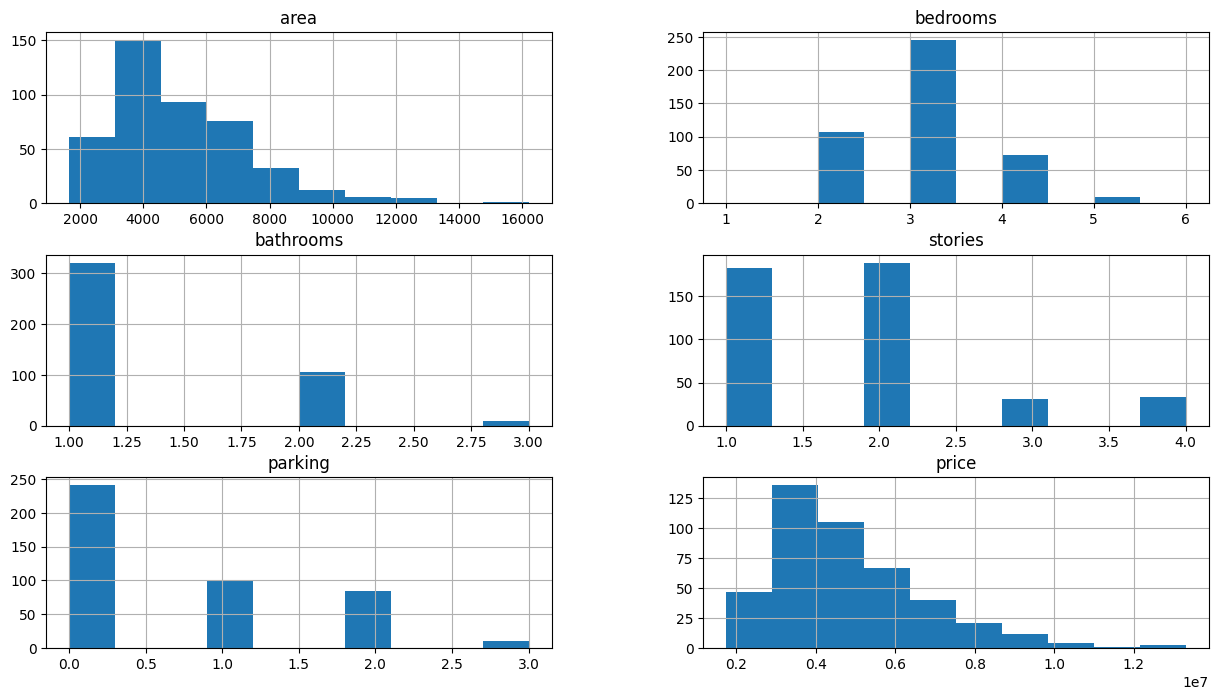

In [28]:
#get histogram for dividual featers with a fixed size
train_data.hist(figsize=(15,8))

In [35]:
#corr() profives a correlation matrix with ints self
train_data.corr(numeric_only = [True])

,area,bedrooms,bathrooms,stories,parking,price
area,1.000000,0.147003,0.196202,0.062969,0.331231,0.540776
bedrooms,0.147003,1.000000,0.366706,0.394039,0.137477,0.342847
bathrooms,0.196202,0.366706,1.000000,0.285263,0.161638,0.498813
stories,0.062969,0.394039,0.285263,1.000000,0.046016,0.386517
parking,0.331231,0.137477,0.161638,0.046016,1.000000,0.374177
price,0.540776,0.342847,0.498813,0.386517,0.374177,1.000000


In [ ]:
#figure and specify size
plt.figure(figsize=(15,8))
#gather data make a corrleration and makes it colorful
sns.heatmap(train_data.corr(numeric_only =[True]), annot=True, cmap="YlGnBu")
